Machine learning
===

Types de problèmes:
- **Régression**: nombre infini de valeurs, variable continue, tenter de prédire une valeur à une variable continue (ex : prix selon différents paramètres)
- **classification**: variable discrète, classer une variable (ex : vrai / faux)

Type d'apprentissage:
- **Supervisé**: on donne pour des valeurs X le résultat Y pour permettre à la machine d'apprendre et trouver l'association f(x) = y
- **Non-supervisé**:

Pour l'apprentissage supervisé, on utilise des dataset pour permettre à l'IA d'apprendre, avec n colonnes (features / paramètre) et m lignes (targets / exemples). Par convention, on note un dataset de cette manière :

|Y|X1|X2|X3|...|Xn|
|:---:|:---:|:---:|:---:|:---:|:---:|
|y^(1)|x^(1)1|x^(1)2|x^(1)3|..|x^(1)n|
|y^(2)|x^(2)1|x^(2)2|x^(2)3|..|x^(2)n|
|..|..|..|..|..|..|
|y^(m)|x^(m)1|x^(m)2|x^(m)3|..|x^(m)n|

On choisi le modèle (fonction linéaire, polynome degré 2, polynome degré 3...) mais c'est l'IA qui choisi les paramètres a, b, c... `f(x) = ... + ax² + bx + c`

Enfin, on va chercher à minimiser la fonction coût représentant l'erreur entre un point et le modèle.


On va créer un problème random, comme le prix des apparts selon leur surface. On va créer un dataset avec 6 points pour commencer.

---
## 1. Étudions le problème
### 1.1. Questions de bases
Resolvons ces 4 questions fondamentales pour bien préparer notre algo :
1. Quel data set ? Sachant notre problème : 
    - (x, y) avec une seule variable, donc un seul x donc `n = 1`
    - 6 points, donc `m = 6`
2. Quel modèle ? régression linaire donc modèle linéaire : `f(x) = ax + b`
3. Quelle fonction coût ? on va regarder la moyenne de la norme euclidienne pour chaque point, donc l'erreur quadratique moyenne : 
    - Norme euclidienne ou distance au carré ou erreur quadratique (= au carré) : `(f(x^(i)) - y^(i))²`
    - On regarde la moyenne (donc : `1/m * somme(erreur_euclidienne)`), soit l'erreur quadratique moyenne : `1/m * SUM( (f(x^(i)) - y^(i))² )` 
    - Pour simplifier pour la suite (pour une dérivée), on va juste rajouter un coef 1/2 : `J(a, b) = 1/2m * SUM( (f(x^(i)) - y^(i))² )` 
4. Minimisation / apprentissage ? un fonction carré est une parabole, et on va chercher le minimum de `J` selon `a`
    - on peut utiliser les moindres carrés, donc chercher où la tagente à la courbe est parallèle aux absisses
    - On peut aussi utiliser la descente de gradient. C'est la solution la plus utilisée car la plus rapide, surtout sur des gros datasets. 
    
### 1.2. La descente de gradient ?
Le principe est de faire des petits pas pour trouver le minimum d'une fonction **CONVEXE** (et seulemenent convexe, sinon on risque de trouver un minimum local, mais pas le global.... Aie). On va donc faire la dérivée de notre fonction coût en un point a pour voir la direction de la courbe. Ensuite, nous ferons un pas alpha : `a` (= learning rate / vitesse de convergence). Plus alpha est grand, plus on va vite arriver au minimum mais moins il sera précis et il risque de toujours éviter le minimum. On a donc :
```
ai+1 = ai - alpha * dJ(ai)/da
```
- si la pente descent, `dJ/da` sera négatif, donc `- alpha * dJ/da` sera positif et donc `ai+1` va avancer un peu. Et vice versa.

### 1.3. La dérivée
`J(a, b)` est une fontion composée : `(g • f)(a, b)` (on a `(f(x^(i)) - y^(i))²`) avec :
- `f(a, b) = ax + b`
- `g(f) = f^2`

Pour rappel, `(g • f)' = f' * g'(f)`, donc:
- $$
\frac{\delta J}{\delta a}   = \frac{\delta [\frac{1}{2m} * \Sigma( f(xi) - yi)² ]}{\delta a}
                            = \frac{\delta [\frac{1}{2m} * \Sigma( ax + b - yi)² ]}{\delta a}
                            = 2 * \frac{1}{2m} * \Sigma x(ax + b - y)  
                            = \frac{1}{m} * \Sigma x(ax + b - y)
$$
- $$
\frac{\delta J}{\delta b}   = \frac{\delta [\frac{1}{2m} * \Sigma( f(xi) - yi)² ]}{\delta a}
                            = \frac{1}{m} * \Sigma ax + b - y
$$

Les expressions sont donc : 
$$
a = a - \alpha * \frac{1}{m} * \Sigma x(ax + b - y)
$$
$$
b = b - \alpha * \frac{1}{m} * \Sigma ax + b - y
$$

---
## 2. Numpy & matrices

Maintenant que l'on a notre modèle, nous allons devoir le matrixifié... Ok ça n'existe pas mais on s'est compris !

### 2.1. Calculs de base avec Numpy

In [1]:
# On va utiliser les matrices et notamment grâce à la librairie Numpy :
import numpy as np

# Petits exemples :
A = np.array([[1, 2], [3, 4], [5, 6]])
print('notre matrice :')
print(A)
print('\nSes dimension (m lignes x n colonnes) sont donc :')
print(A.shape)

notre matrice :
[[1 2]
 [3 4]
 [5 6]]

Ses dimension (m lignes x n colonnes) sont donc :
(3, 2)


In [2]:
# On va aussi devoir utiliser la transposé :
A.T

array([[1, 3, 5],
       [2, 4, 6]])

In [3]:
# On peut aisément créer une matrice de 0 avec 'zeros' ou encore de 1 avec 'ones' :
B = np.ones((3, 2))

# Et enfin additionner, soustraire ou faire le produit matriciel les matrices entre elles:
A + B, A - B, A.dot(A.T)

(array([[2., 3.],
        [4., 5.],
        [6., 7.]]),
 array([[0., 1.],
        [2., 3.],
        [4., 5.]]),
 array([[ 5, 11, 17],
        [11, 25, 39],
        [17, 39, 61]]))

### 2.2. Expression matricielle du modèle
On avait pour chaque prédiction : $$ f(x^{(i)}) = a * x^{(i)} + b $$  
On va trasformer `f` en vecteur `F` contenant toutes nos predictions : 
$$ 
F = X . \theta 
\\ \mbox{avec : } \theta = \left[ \begin{array}{c} a \\ b \end{array} \right]
\\ \mbox{et X contenant } \left[ \begin{array}{c c c} x^{(1)} \mbox{ } 1 \\ x^{(2)} \mbox{ } 1 \\ ... \mbox{ } ... \\ x^{(m)} \mbox{ } 1 \end{array} \right]
$$ 

Étudions les dimensions, nous aurons `X = m * (n + 1)` et `theta = (n + 1) * 1` avec n = 1 (+1 représentant l'ajout du biais), et il en résultera `F = m * 1`.


### 2.3. Expression matricielle de la fonction coût

Pour rappel, nous avions :
$$
\frac{J(a, b)}{1*1} = \frac{1}{2m} \sum_{i=1}^{m} (ax^{(i)} + b - y^{(i)})²
$$
`ax^(i) + b` deviendra `XTheta` (dim m*1), y deviendra `Y` (dim m*1). `XTheta + Y` sera donc de dimension m * 1 et tous ses éléments seront mis au carré.  
Enfin, on va additionner tous les éléments, nous donnant donc un seul nombre (un scalaire) que l'on multipliera par `1/2m` et donc nous aurons toujours qu'un seul nombre.  
On aura donc l'expression matricielle de la fonction coût qui sera :
$$
{J(\theta)} = \frac{1}{2m} \sum (X\theta - Y)²
$$


### 2.4. Expression matricielle de la fonction coût
Nous avions tout à l'heure :
- $$
\frac{\delta J}{\delta a}   = \frac{1}{m} * \Sigma x * (ax + b - y)
$$
- $$
\frac{\delta J}{\delta b}   = \frac{1}{m} * \Sigma 1 * (ax + b - y)
$$

Afin de simplifier, nous allons les regrouper dans une matrice selon theta :
$$
\frac{\delta J(\theta)}{\delta \theta}   = \frac{1}{m} * X^T (X\theta - Y)
$$

`X * theta - Y` vient de notre expression `ax + b - y` et la transposée de X vient du fait que pour `a` on a multiplié par tous les `xi` et pour `b`, nous multiplions que par `1`. Pour rapelle, X est composé d'une colonne avec les `xi` et d'une colonne de `1`. Donc, afin de pouvoir effectuer le produit matriciel avec `X * theta - Y`, on va prendre la transposée de X.


### 2.5. Expression matricielle de la descente de gradiant
Il ne reste plus qu'à tout remplacer et nous avons donc :
$$
\theta_{n+1} = \theta_n - \alpha \frac{\delta J(\theta_n)}{\delta \theta_n}
$$

---
## 3. Python
C'est parti pour la partie programmation !

In [4]:
# réimportons, soyons fou, ça ne coute rien !
import numpy as np
# Pour nos graphs
import matplotlib.pyplot as plt
# pour se simplifier la vie, on va utiliser scikit pour générer un set de données
from sklearn.datasets import make_regression

### 3.1. Dataset

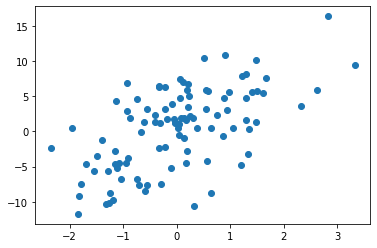

In [5]:
x, y = make_regression(n_samples=100, n_features=1, noise=5)
plt.scatter(x, y)

In [6]:
print(x.shape)
print(y.shape)  # outch, y n'est pas à la bonne dimension...

y = y.reshape(y.shape[0], 1)
print(y.shape)  # mieux !

(100, 1)
(100,)
(100, 1)


In [7]:
# Initialisons X
# hstack permet de combiner deux matrices, ici on veut que X soit composé d'une colonne x et une colonne de 1
X = np.hstack((x, np.ones(x.shape)))

In [8]:
# Initialisons Theta
# sachant que l'on ne connait pas les valeurs de theta (c'est à la machine de les trouver),
# on va l'initialiser de manière rondom
theta = np.random.randn((y.shape[1] + 1), 1)
theta.shape, theta

((2, 1),
 array([[-0.32041649],
        [ 1.43231427]]))

### 3.2. Modèle

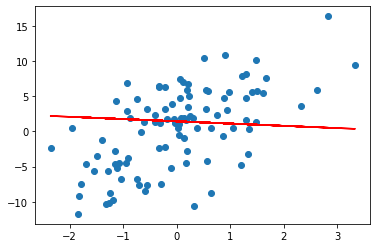

In [9]:
def model(X, theta):
    return X.dot(theta)

def plot(x, y, prediction):
    plt.scatter(x, y)
    plt.plot(x, prediction, c='r')
    
plot(x, y, model(X, theta))

### 3.3. Cost Function

In [10]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

cost_function(X, y, theta)  # Pour tester en speed... aie, très gros coût, mais on s'en doutait !

17.741251464362705

### 3.4. Gradients et descente

In [11]:
def gradient(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [12]:
def gradient_descent(x, y, theta, learning_rate, iterations):
    for i in range(0, iterations):
        theta = theta - learning_rate * gradient(X, y, theta)
        
    return theta

### 3.5. Machine learning

In [13]:
res_theta = gradient_descent(X, y, theta, learning_rate=10e-3, iterations=1000)
res_theta

array([[3.11817579],
       [0.46794399]])

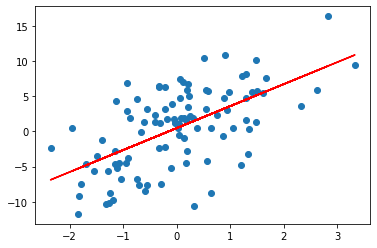

In [14]:
predictions = model(X, res_theta)
plot(x, y, predictions)

### 3.6. Allons un peu plus loin

Pour voir l'évolution de la fonction coût, on va update gradient_descent():

In [15]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(0, iterations):
        theta = theta - learning_rate * gradient(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
        
    return theta, cost_history

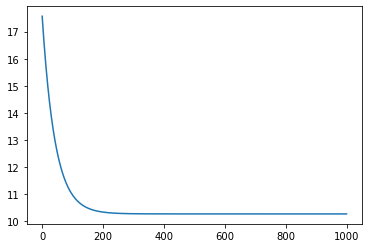

In [16]:
res_theta, cost_history = gradient_descent(X, y, theta, learning_rate=10e-3, iterations=1000)
plt.plot(range(1000), cost_history)

On voit ici que très vite, le modèle à trouver la solution et que l'on aurait pu économiser de la ressource.

### 3.7. Coeficient de détermination

Pour montrer si le modèle est bon (ou non), on va calculer le coef de détermination R²:
$$
R² = 1 - \frac{\sum(y - f(x))²}{\sum(y - \overline{y})²}
$$

Plus c'est proche de 1, plus le modèle est fiable. 

Testons !

In [17]:
def determination_coeficient(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    
    return 1 - u/v

determination_coeficient(y, predictions)

0.3602750155803165

Barvo, 0.997 c'est un très bon score !

---
## 4. Modèle Polynomial & Régression linéaire multiple
### 4.1. Modèle Polynomial
La régression linéaire est très sympa mais..... elle est linéaire. Nous avons souvent des problèmes complexes non linéaire dans le monde. Pour le modéliser, on peut se servier de modèles linéaires multiples et donc garder nos fonctions précédentes !

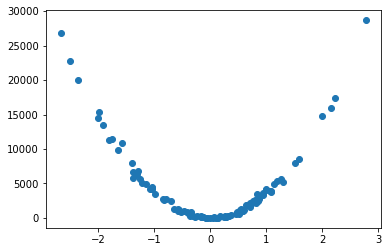

In [18]:
x, y = make_regression(n_samples=100, n_features=1, noise=5)
y = y.reshape(y.shape[0], 1)

y = y * y/2  # on délinéarise un peu

plt.scatter(x, y)

In [19]:
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X))
print(X.shape)

theta = np.random.randn(X.shape[1], 1)
theta

(100, 3)


array([[ 0.10463699],
       [ 1.90029438],
       [-0.64115712]])

(100, 3)
(100, 1)
(3, 1)
[[3630.95242118]
 [ -86.85508427]
 [  34.58897801]]


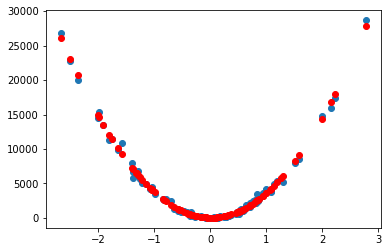

In [20]:
res_theta, cost_history = gradient_descent(X, y, theta, learning_rate=10e-3, iterations=1000)

print(res_theta)

predictions = model(X, res_theta)

plt.scatter(x, y)
plt.scatter(x, predictions, c='r')

0.9953774749966572


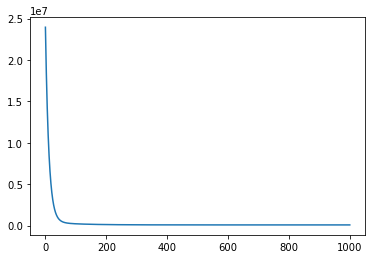

In [21]:
print(determination_coeficient(y, predictions))
plt.plot(range(1000), cost_history)

### 4.2. Régression linéaire multiple
On va refaire un modèle mais cette fois avec plusieurs x (ici, 2) :

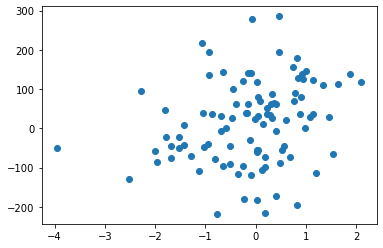

In [22]:
x, y = make_regression(n_samples=100, n_features=2, noise=5)
y = y.reshape(y.shape[0], 1)

plt.scatter(x[:,0], y)

In [23]:
X = np.hstack((x, np.ones((x.shape[0], 1))))
print(X.shape)

theta = np.random.randn(X.shape[1], 1)
theta

(100, 3)


array([[ 1.54123537],
       [-0.51206163],
       [-0.29051022]])

[[22.39202438]
 [98.7621632 ]
 [ 0.1345058 ]]


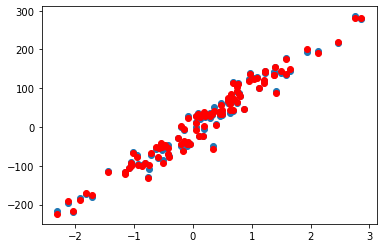

In [24]:
res_theta, cost_history = gradient_descent(X, y, theta, learning_rate=10e-3, iterations=1000)

print(res_theta)

predictions = model(X, res_theta)

# ATTENTION, ici on a plusieurs variables donc l'affichage 2D sera assez étrange à regarder.
# En effet, le résultat ne sera pas une ligne mais une surface !
plt.scatter(x[:,1], y)
plt.scatter(x[:,1], predictions, c='r')

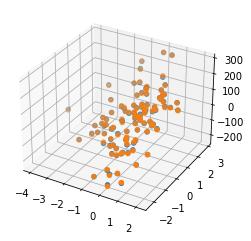

In [25]:
# Testons donc en 3D :
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# Si la commande ci-dessous ne fonctionne pas, installez ceci :
# pip install ipympl
# conda install -c conda-forge nodejs
# jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyter-matplotlib
#
# ou utilisez inline avec ça : %matplotlib inline
# %matplotlib widget
%matplotlib inline


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:, 0], x[:, 1], y)
ax.scatter(x[:, 0], x[:, 1], predictions)

0.9981889754699558


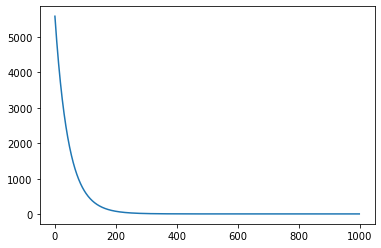

In [26]:
print(determination_coeficient(y, predictions))
plt.plot(range(1000), cost_history)

---

Thibault **Santonja**  
2021